<a href="https://colab.research.google.com/github/ShaunakSen/DS-ML-Concepts/blob/main/Applied_Stats_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prob Distributions

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### Similate the Prob Distribution Function of Sum of N pair turns of dice throw

In [20]:
N = 10000
num_throws = 2

outcomes = []

for i in range(N):
    throw_results = [random.randint(1, 6) for _ in range(num_throws)]
    throw_sum = sum(throw_results)
    outcomes.append(throw_sum)

In [21]:
outcomes[:10]

[2, 8, 5, 4, 12, 8, 10, 3, 12, 4]

In [28]:
pmf = pd.Series(outcomes).value_counts(normalize=True).sort_index()

In [40]:
pmf = pd.DataFrame(pmf).reset_index().rename(columns={"index": "outcome"})

In [42]:
pmf['cdf'] = pmf['proportion'].cumsum()

In [44]:
pmf

,outcome,proportion,cdf
0,2,0.0267,0.0267
1,3,0.0578,0.0845
2,4,0.0787,0.1632
3,5,0.1141,0.2773
4,6,0.1374,0.4147
5,7,0.1616,0.5763
6,8,0.1431,0.7194
7,9,0.1108,0.8302
8,10,0.0848,0.9150
9,11,0.0569,0.9719


In [45]:
np.sum(pmf['proportion'])

np.float64(0.9999999999999999)

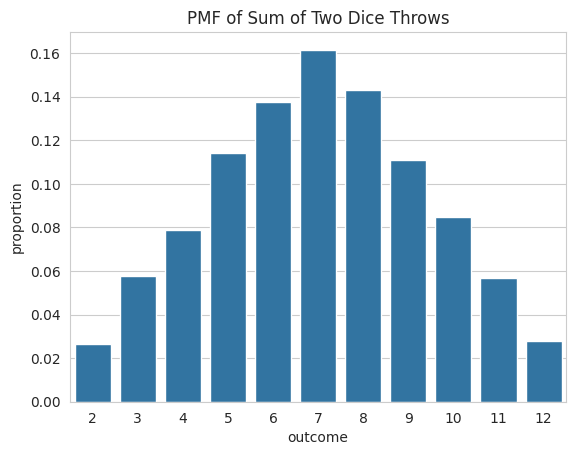

In [51]:
# plot a bar plot using seaborn: x axis outcomes y axis: probablility
sns.barplot(x=pmf['outcome'], y=pmf['proportion']);
# set a title
plt.title("PMF of Sum of Two Dice Throws");

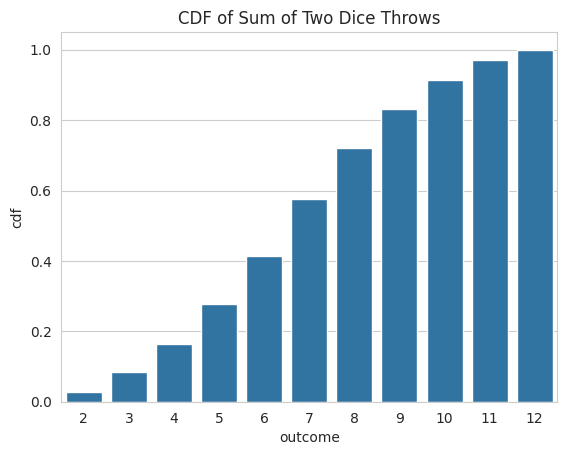

In [52]:
sns.barplot(x=pmf['outcome'], y=pmf['cdf']);
# set a title
plt.title("CDF of Sum of Two Dice Throws");

## Prarametric Density Estimation

In [2]:
# generate some data from a normal distribution

sample = np.random.normal(loc=50, scale=5, size=1000)

print (sample.shape, np.mean(sample), np.std(sample))

(1000,) 49.82650767915572 4.8271949314411335


Note this is continuous data

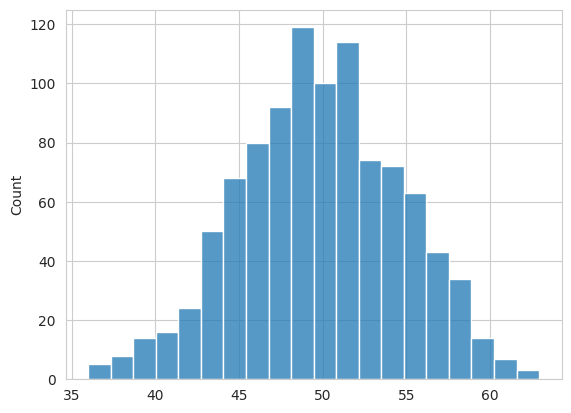

In [3]:
# plot histogram to understand the distribution of data
sns.histplot(sample, bins=20);

Ok so data looks like normal

In [4]:
# estimate sample mean and sample std dev

sample_mean, sample_std = np.mean(sample), np.std(sample)

In [5]:
# fit the distribution with the above parameters

from scipy.stats import norm

dist = norm(loc=sample_mean, scale=sample_std)

In [9]:
dist.mean(), dist.std()

(np.float64(49.82650767915572), np.float64(4.8271949314411335))

In [10]:
values = np.linspace(sample.min(), sample.max(), 100) # generate 100 evenly spaced data pts in the range of the sample data

In [11]:
probability_densitites = [dist.pdf(value) for value in values]

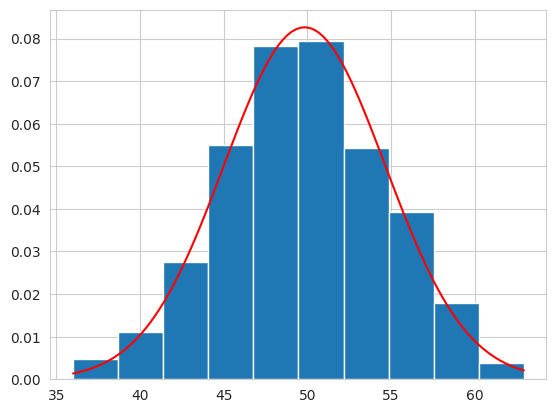

In [23]:
# plot the computed probabilty density function
plt.hist(sample, bins=10, density=True);
plt.plot(values, probability_densitites, 'r');

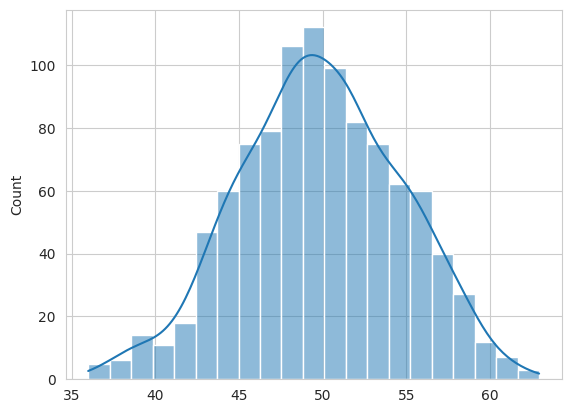

In [24]:
# we can do the same with seaborn
sns.histplot(sample, kde=True);

## Non - Prarametric Density Estimation (KDE)

In [25]:
sample1 = np.random.normal(loc=20, scale=5, size=300)
sample2 = np.random.normal(loc=40, scale=5, size=700)

sample1.shape, sample2.shape

((300,), (700,))

In [43]:
sample[:10]

array([10.75916259, 18.24862685, 14.41375742, 17.38067691, 23.49441137,
       21.8507096 , 16.98933952, 18.03466731, 19.03433627, 19.83526846])

In [26]:
sample = np.hstack([sample1, sample2])

sample.shape

(1000,)

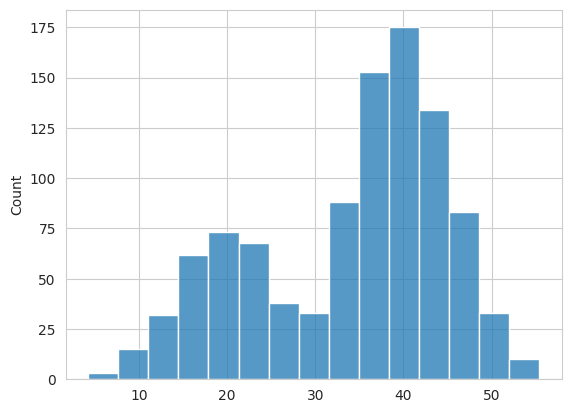

In [27]:
# plot histogram

sns.histplot(sample);

As we can see that this data does not represent any known distribution

In [28]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(kernel='gaussian', bandwidth=3)

In [29]:
sample_2D = sample.reshape(-1, 1)
sample_2D.shape

(1000, 1)

In [31]:
model.fit(sample_2D)

KernelDensity(bandwidth=3)

In [32]:
model.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 3,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

Now that we have fitted a distribution, we can generate new samples from this

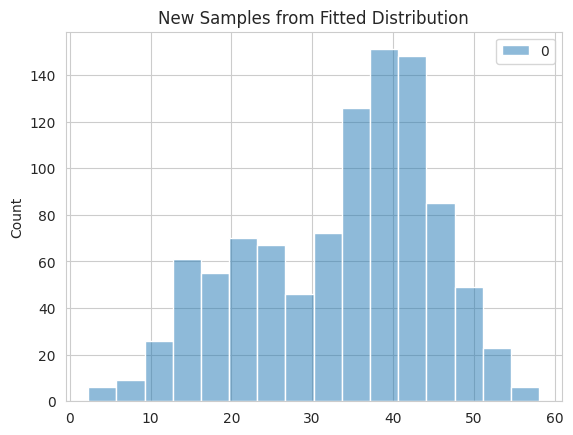

In [34]:
new_samples_from_fitted_dist = model.sample(1000)

# plot histogram
sns.histplot(new_samples_from_fitted_dist);

# set title
plt.title("New Samples from Fitted Distribution");

In [36]:
np.mean(new_samples_from_fitted_dist), np.std(new_samples_from_fitted_dist)

(np.float64(33.51686992331852), np.float64(11.371506593531272))

Now lets generate the probability density curve

In [37]:
values = np.linspace(sample.min(), sample.max(), 100).reshape(-1, 1)

values.shape

(100, 1)

In [39]:
probability_densitites = model.score_samples(values)

probability_densitites = np.exp(probability_densitites)

In [40]:
pd.Series(probability_densitites).describe()

,0
count,100.000000
mean,0.019255
std,0.013257
min,0.000784
25%,0.009536
50%,0.016926
75%,0.026670
max,0.046075


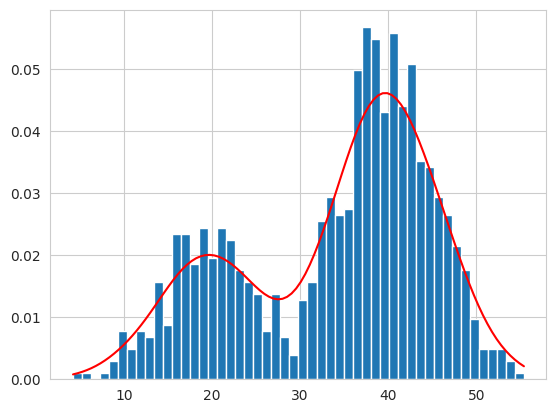

In [42]:
plt.hist(sample, bins=50, density=True);
plt.plot(values, probability_densitites, 'r');
plt.show()

X axis : data point

Y axis: prob of observing that data pt given the learned prob distribution

```
- < 10: v low

- around 20: high

- 25-30: low

- around 40: highest

- > 50: v low

```

This is similar to our original sample data